In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN

In [62]:
# df_temp=pd.read_csv('body_level_classification_train.csv')
# class_temp=df_temp[df_temp['Body_Level']=='Body Level 1'].drop(columns=['Body_Level'])


50.11651882105264


In [152]:
df,attributes,class_1_df,class_2_df,class_3_df,class_4_df=read_data()

# Analyze the dataset

In [153]:
# #add bmi as a new feature
# df['BMI']=attributes['Weight']/((attributes['Height']/100)**2)
# # Healthy Habits Score: A score can be calculated based on the frequency of high caloric food consumption, vegetables consumption, water consumption, alcohol consumption, and smoking. Higher scores indicate healthier habits.
# df['Healthy_Habits_Score']=attributes['H_Cal_Consump']+attributes['Veg_Consump']+attributes['Water_Consump']+attributes['Alcohol_Consump']+attributes['Smoking']
# # Physical Activity Level: The frequency of physical activity and the type of transport used can be combined to create a new feature that represents the level of physical activity.
# df['Physical_Activity_Level']=attributes['H_Cal_Burn']+attributes['Transport']

In [154]:
def check_missing_value():
    return attributes.isnull().values.any(), df['Body_Level'].isnull().values.any()
print(f'attributes missing value: {check_missing_value()[0]}')
print(f'classes missing value: {check_missing_value()[1]}')

attributes missing value: False
classes missing value: False


* No missing values

In [155]:
def classes_probability():
    class_prob = {}
    for c in df['Body_Level'].unique():
        class_prob[c] = len(df[df['Body_Level'] == c]) / len(df)
    return class_prob
class_prob=classes_probability()
for key, value in class_prob.items():
    print(f'probability of class {key}: {value}')

probability of class 1: 0.12863913337846988
probability of class 2: 0.13608666215301288
probability of class 3: 0.27488151658767773
probability of class 4: 0.46039268788083954


* we can see that the dataset is imbalanced as the last class(class 4) has almost 50% of the data samples.

In [156]:
def plot_hist_class(class_num):
    #from df get rows with Body_Level== Body Level class_num
    #and plot histogram for each attribute
    if class_num==1:
        class_df=class_1_df
    elif class_num==2:
        class_df=class_2_df
    elif class_num==3:
        class_df=class_3_df
    else:
        class_df=class_4_df
    fig, axs = plt.subplots(4, 4, figsize=(20, 12))
    fig.suptitle(f'Body Level {class_num} Histogram', fontsize=16)
    axs = axs.flatten()
    for i, col in enumerate(class_df.columns):
        axs[i].hist(class_df[col], bins=10)
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()
     

In [157]:
def get_important_metrices_class(target_class):
    for attr in target_class.columns:
        print(target_class[attr].describe())
        if attr in code_value.keys():
            print(f"mode   {list(code_value[attr].keys())[list(code_value[attr].values()).index(target_class[attr].value_counts().idxmax())]}")
            print(f"mode percentage   {target_class[attr].value_counts().max()/len(target_class[attr])*100}")
        else:   
            print(f"mode   {target_class[attr].value_counts().idxmax()}")
            print(f"mode percentage   {target_class[attr].value_counts().max()/len(target_class[attr])*100}")
        print('')

In [158]:
# plot_hist_class(1)
# plot_hist_class(2)
# plot_hist_class(3)
# plot_hist_class(4)

In [159]:
get_important_metrices_class(class_1_df)

count    190.000000
mean       0.347368
std        0.477392
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Gender, dtype: float64
mode   Female
mode percentage   65.26315789473685

count    190.000000
mean      19.836868
std        2.582763
min       16.000000
25%       18.000000
50%       19.284757
75%       21.266756
max       34.799519
Name: Age, dtype: float64
mode   18.0
mode percentage   10.0

count    190.000000
mean       1.692227
std        0.100821
min        1.520000
25%        1.598959
50%        1.700744
75%        1.759840
max        1.900000
Name: Height, dtype: float64
mode   1.7
mode percentage   4.2105263157894735

count    190.000000
mean      50.116519
std        6.221684
min       39.000000
25%       44.684582
50%       50.000000
75%       54.155321
max       65.000000
Name: Weight, dtype: float64
mode   50.0
mode percentage   11.578947368421053

count    190.000000
mean       0.831579
std        0.375229
m

In [160]:
get_important_metrices_class(class_2_df)

count    201.000000
mean       0.487562
std        0.501093
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Gender, dtype: float64
mode   Female
mode percentage   51.243781094527364

count    201.000000
mean      21.487562
std        4.604465
min       16.000000
25%       19.000000
50%       21.000000
75%       23.000000
max       51.000000
Name: Age, dtype: float64
mode   21.0
mode percentage   18.90547263681592

count    201.000000
mean       1.674925
std        0.098935
min        1.500000
25%        1.600000
50%        1.650000
75%        1.750000
max        1.930000
Name: Height, dtype: float64
mode   1.6
mode percentage   7.960199004975125

count    201.000000
mean      61.797512
std        9.500418
min       42.300000
25%       55.000000
50%       60.000000
75%       68.000000
max       87.000000
Name: Weight, dtype: float64
mode   60.0
mode percentage   10.44776119402985

count    201.000000
mean       0.696517
std      

In [161]:
get_important_metrices_class(class_3_df)

count    406.000000
mean       0.571429
std        0.495482
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Gender, dtype: float64
mode   Male
mode percentage   57.14285714285714

count    406.000000
mean      25.269630
std        7.384011
min       16.000000
25%       19.978745
50%       22.662736
75%       29.885973
max       55.246250
Name: Age, dtype: float64
mode   21.0
mode percentage   6.403940886699508

count    406.000000
mean       1.694027
std        0.094525
min        1.456346
25%        1.626717
50%        1.700000
75%        1.755273
max        1.930000
Name: Height, dtype: float64
mode   1.7
mode percentage   5.172413793103448

count    406.000000
mean      78.021020
std        9.392409
min       53.620604
25%       70.000000
50%       78.998531
75%       85.000000
max      102.000000
Name: Weight, dtype: float64
mode   80.0
mode percentage   4.679802955665025

count    406.000000
mean       0.834975
std        0

In [162]:
get_important_metrices_class(class_4_df)

count    680.000000
mean       0.514706
std        0.500152
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Gender, dtype: float64
mode   Male
mode percentage   51.470588235294116

count    680.000000
mean      25.778641
std        5.968319
min       15.000000
25%       21.681806
50%       25.081727
75%       27.577858
max       52.000000
Name: Age, dtype: float64
mode   26.0
mode percentage   9.117647058823529

count    680.000000
mean       1.716630
std        0.089095
min        1.500000
25%        1.640508
50%        1.733411
75%        1.781167
max        1.980000
Name: Height, dtype: float64
mode   1.65
mode percentage   1.6176470588235297

count    680.000000
mean     109.122043
std       17.452042
min       75.000000
25%       99.512744
50%      109.619180
75%      120.169186
max      173.000000
Name: Weight, dtype: float64
mode   80.0
mode percentage   2.5

count    680.000000
mean       0.983824
std        0.126247
min

In [163]:
def check_outliers():
    for col in attributes.columns:
        if attributes[col].dtype != 'category':
            if not is_categorical(col):
                q1 = np.percentile(attributes[col], 25)
                q3 = np.percentile(attributes[col], 75)
                iqr = q3 - q1
                lower_bound = q1 - (1.5 * iqr)
                upper_bound = q3 + (1.5 * iqr)
                print(f'number of outliers in {col}: {len(attributes[(attributes[col] < lower_bound) | (attributes[col] > upper_bound)])}')
check_outliers()

number of outliers in Age: 119
number of outliers in Height: 0
number of outliers in Weight: 1
number of outliers in Veg_Consump: 0
number of outliers in Water_Consump: 0
number of outliers in Meal_Count: 405
number of outliers in Phys_Act: 0
number of outliers in Time_E_Dev: 0


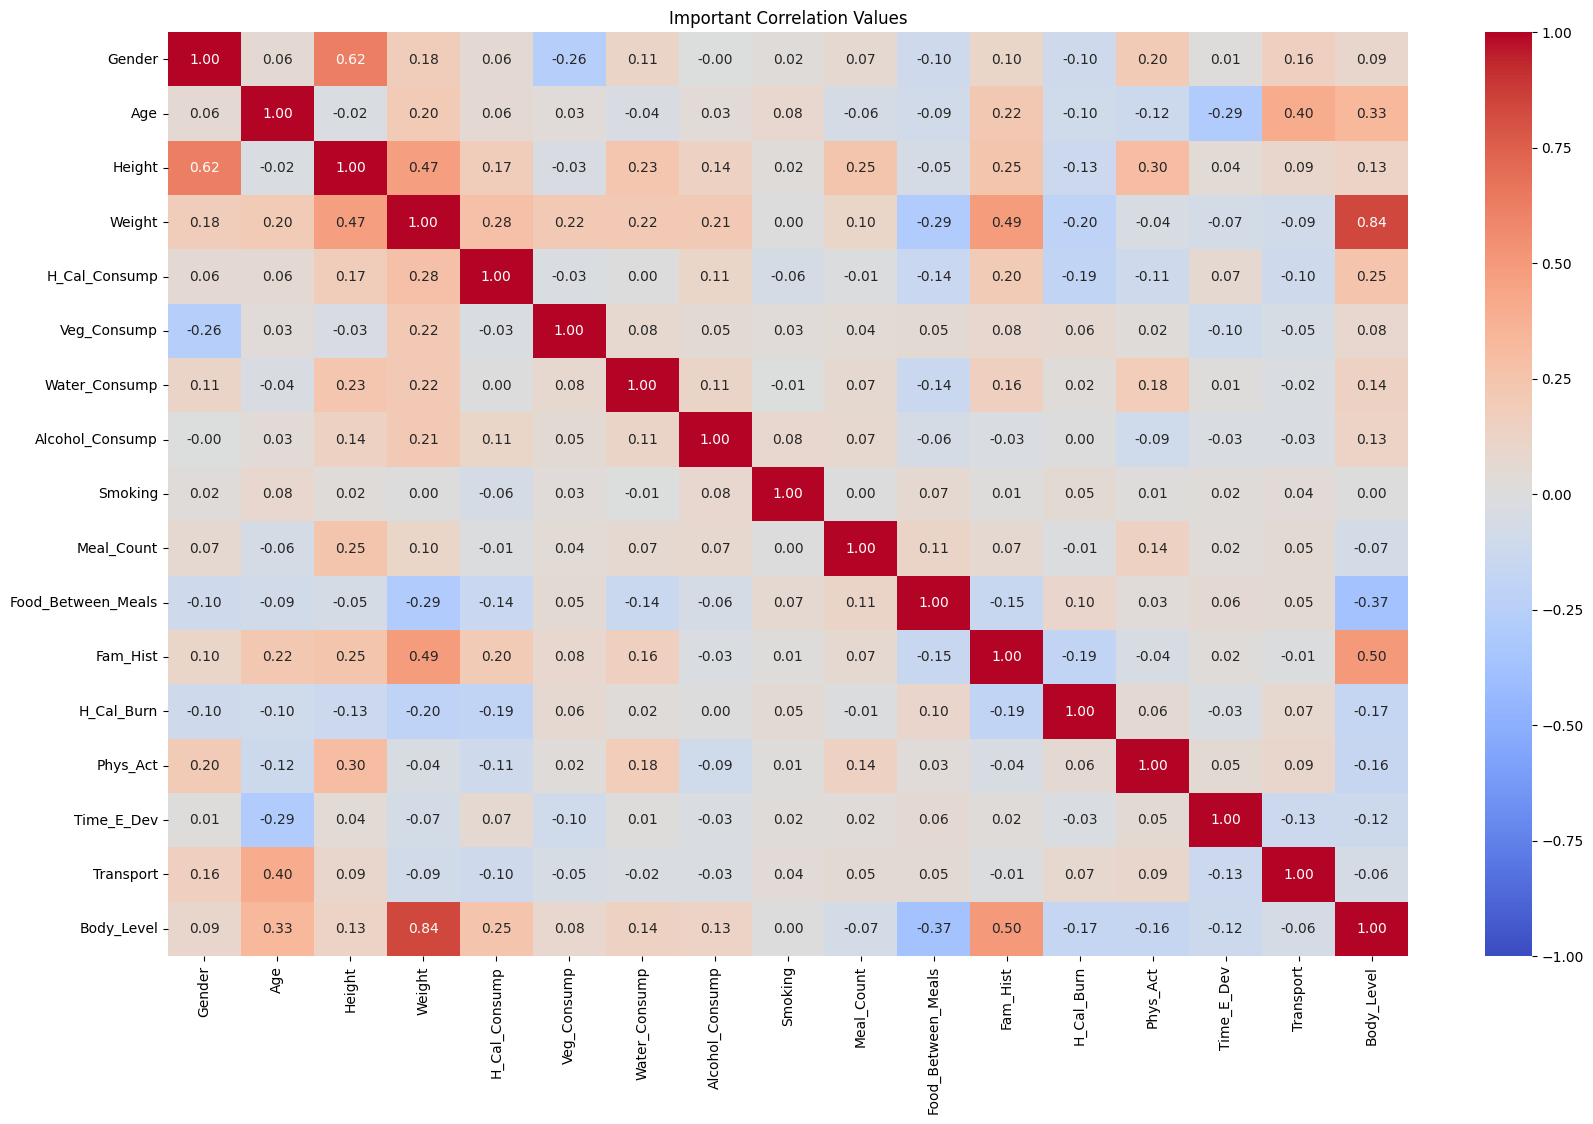

In [164]:
corr=df.corr()
plt.figure(figsize=(20, 12))
(sns.heatmap(corr, annot=True, cmap="coolwarm",
             vmin=-1, vmax=1, mask=corr.isnull(), fmt='.2f')
 .set_title("Important Correlation Values"))
plt.show()

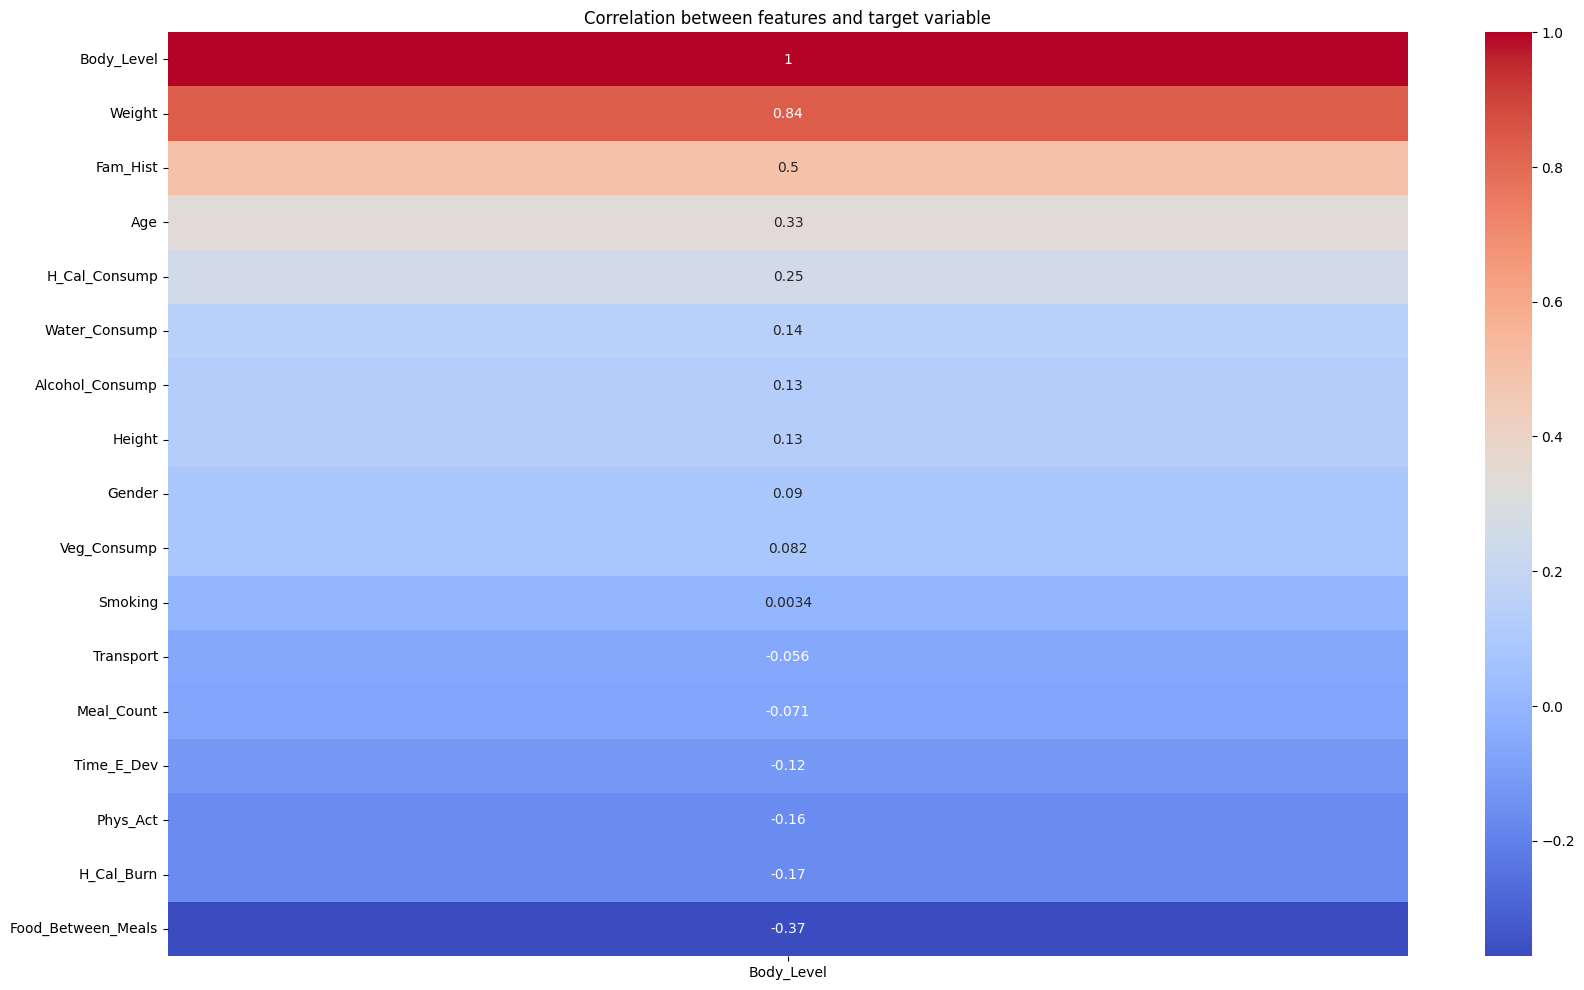

In [165]:
# visualize the correlation between the features and the target variable
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr()[['Body_Level']].sort_values(by='Body_Level', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation between features and target variable')
plt.show()

# Data Preprocessing

Train set
Body_Level
4    0.460627
3    0.274344
2    0.136325
1    0.128704
Name: proportion, dtype: float64
Test set
Body_Level
4    0.459459
3    0.277027
2    0.135135
1    0.128378
Name: proportion, dtype: float64


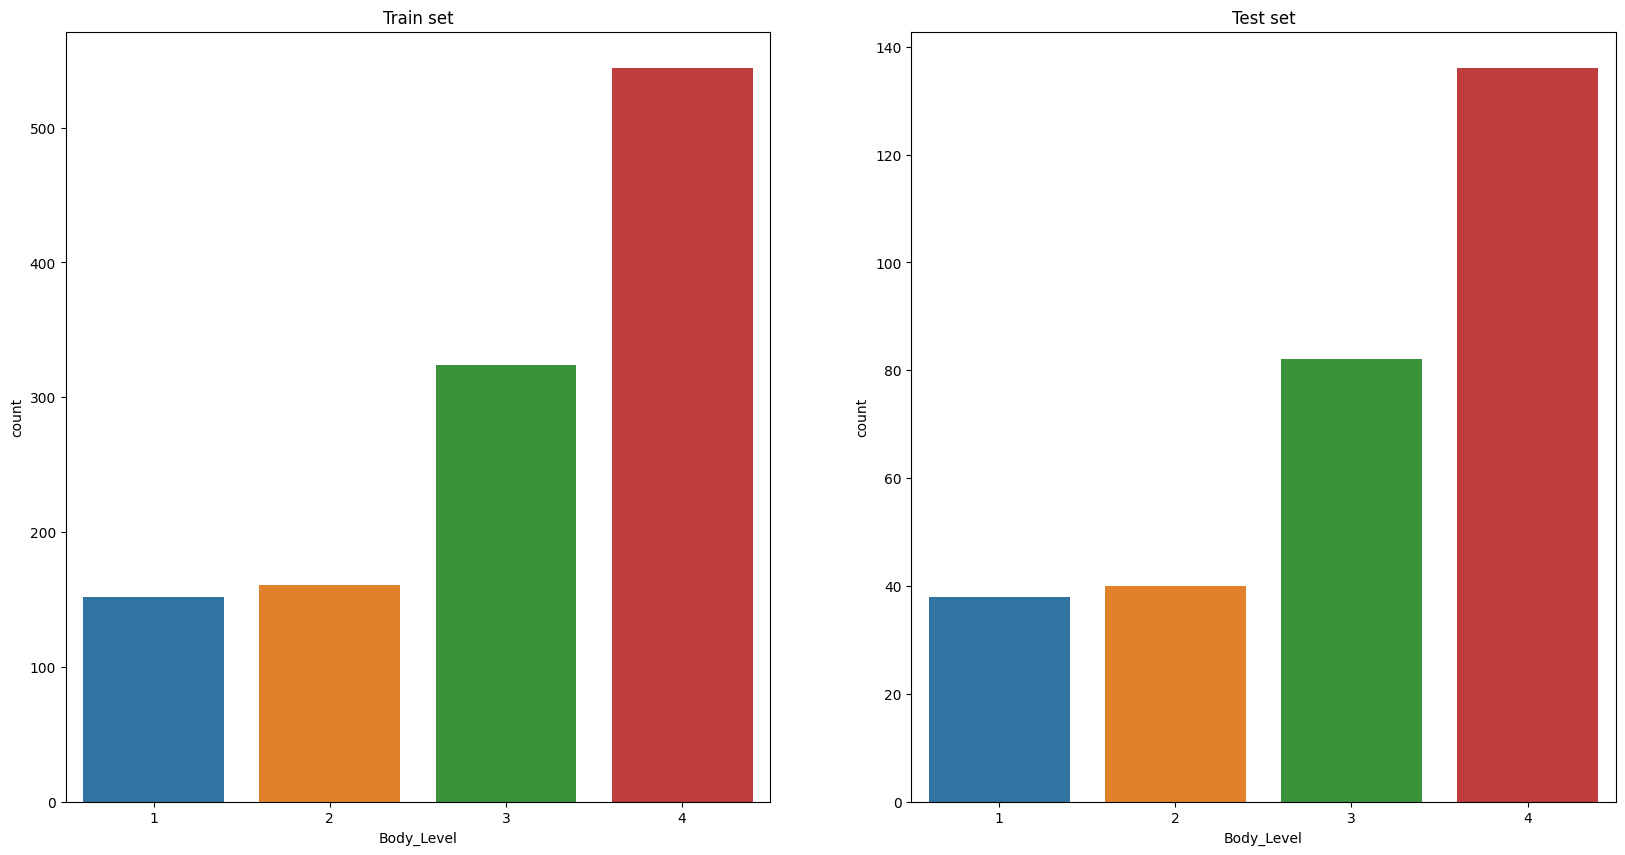

In [171]:
X = attributes
y = df['Body_Level']


# split unbalanced data into train and test sets using stratification sampling


# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in sss.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# check the distribution of the classes in the train and test sets
print('Train set')
print(y_train.value_counts(normalize=True))
print('Test set')
print(y_test.value_counts(normalize=True))


# Visualize the distribution of the classes in the train and test sets
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(x=y_test, ax=ax[1])
ax[1].set_title('Test set')
plt.show()

# Apply machine learning methods

In [173]:
def train_model(model, X_train, y_train):
    # train the model
    model.fit(X_train, y_train)

    # return the trained model
    return model

def predict(model, X_test, y_test):
    # make predictions using the trained model
    y_pred = model.predict(X_test)

    # return the predictions
    return y_pred

def evaluate_model(y_test, y_pred):
    # calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # calculate the precision score
    precision = precision_score(y_test, y_pred, average='weighted')

    # calculate the recall score
    recall = recall_score(y_test, y_pred, average='weighted')

    # calculate the f1 score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # return the evaluation metrics
    return accuracy, precision, recall, f1

## 1.Naive Algorithms

### 1.1randomly guess the class

In [176]:
def predict_uniform_randomly_selected_class():
    # predict the test set using uniform random selection
    y_pred = np.random.choice(y_train.unique(), size=len(y_test))
    acc, prec, rec, f1 = evaluate_model(y_test, y_pred)
    print(f'Accuracy: {acc}')
    print(f'Precision: {prec}')
    print(f'Recall: {rec}')
    print(f'F1: {f1}')
predict_uniform_randomly_selected_class()

Accuracy: 0.25
Precision: 0.3068832573051983
Recall: 0.25
F1: 0.2550936553548471


### 1.2 randmly guess the class with the same probability as the class distribution

In [177]:
def predict_uniform_randomly_selected_class_with_prior_probabilities():
    y_pred = np.random.choice(y_train.unique(), size=len(y_test), p=y_train.value_counts(normalize=True))
    acc, prec, rec, f1 = evaluate_model(y_test, y_pred)
    print(f'Accuracy: {acc}')
    print(f'Precision: {prec}')
    print(f'Recall: {rec}')
    print(f'F1: {f1}')
predict_uniform_randomly_selected_class_with_prior_probabilities()

Accuracy: 0.30405405405405406
Precision: 0.306396023206368
Recall: 0.30405405405405406
F1: 0.29505878240797084


### 1.3 estimating F(x) using BMI equation

In [174]:
def estimated_function_model():
        my_predications = []
        for i in range(len(attributes)):
            bmi = attributes['Weight'][i] / (attributes['Height'][i] ** 2)
            if bmi < 18.5:
                my_predications.append(1)
            elif bmi < 25:
                my_predications.append(2)
            elif bmi < 30:
                my_predications.append(3)
            else:
                my_predications.append(4)
        #calculate accuracy
        correct = 0
        print(len(df['Body_Level']))
        for i in range(len(df['Body_Level'])):
            if df['Body_Level'][i] == my_predications[i]:
                correct += 1
        acc, prec, rec, f1 = evaluate_model(df['Body_Level'], my_predications)
        print(f'Accuracy: {acc}')
        print(f'Precision: {prec}')
        print(f'Recall: {rec}')
        print(f'F1: {f1}')
estimated_function_model()

1477
Accuracy: 0.987136086662153
Precision: 0.9876409977176136
Recall: 0.987136086662153
F1: 0.9871927873349686


## 2.Linear Algorithms

### 2.1Naive Bayes

In [181]:
model=GaussianNB()
model_name=""
trained_model = train_model(model, X_train, y_train)
y_pred = predict(trained_model, X_test, y_test)
acc, prec, rec, f1 = evaluate_model(y_test, y_pred)
print(f"model: {model_name}")
print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1: {f1}')

model: 
Accuracy: 0.6587837837837838
Precision: 0.6853938960597104
Recall: 0.6587837837837838
F1: 0.6179473178474034


## 3.Ensemble Algorithms

### 3.1Random Forest

In [182]:
model=RandomForestClassifier()
model_name="Random Forest"
trained_model = train_model(model, X_train, y_train)
y_pred = predict(trained_model, X_test, y_test)
acc, prec, rec, f1 = evaluate_model(y_test, y_pred)
print(f"model: {model_name}")
print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1: {f1}')

model: Random Forest
Accuracy: 0.9459459459459459
Precision: 0.9469715250965252
Recall: 0.9459459459459459
F1: 0.9458792036999885


## Applying oversampling

### 1.Adasyn

In [200]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'sampling_strategy': ['minority', 'not minority', 'auto','all','not majority']
}
adasyn=ADASYN()
grid_search = GridSearchCV(estimator=adasyn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2,scoring='accuracy')
grid_search.fit(X_train, y_train)
#get the best parameters in the last iteration
print(grid_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........n_neighbors=3, sampling_strategy=minority; total time=   0.0s
[CV] END ..........n_neighbors=3, sampling_strategy=minority; total time=   0.0s
[CV] END ..........n_neighbors=3, sampling_strategy=minority; total time=   0.0s
[CV] END ......n_neighbors=3, sampling_strategy=not minority; total time=   0.0s
[CV] END ......n_neighbors=3, sampling_strategy=not minority; total time=   0.0s
[CV] END ......n_neighbors=3, sampling_strategy=not minority; total time=   0.0s
[CV] END ..............n_neighbors=3, sampling_strategy=auto; total time=   0.0s
[CV] END ..............n_neighbors=3, sampling_strategy=auto; total time=   0.0s
[CV] END ..............n_neighbors=3, sampling_strategy=auto; total time=   0.0s
[CV] END ...............n_neighbors=3, sampling_strategy=all; total time=   0.0s
[CV] END ...............n_neighbors=3, sampling_strategy=all; total time=   0.0s
[CV] END ...............n_neighbors=3, sampling_

/home/hazemabdo/Desktop/last_term/ML/Project/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/hazemabdo/Desktop/last_term/ML/Project/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/hazemabdo/Desktop/last_term/ML/Project/.venv/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/home/hazemabdo/Desktop/last_term/ML/Project/.venv/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/hazemabdo/Desktop/last_term/ML/Project/.venv/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)

[CV] END ..............n_neighbors=9, sampling_strategy=auto; total time=   0.0s
[CV] END ...............n_neighbors=9, sampling_strategy=all; total time=   0.0s
[CV] END ...............n_neighbors=9, sampling_strategy=all; total time=   0.0s
[CV] END ...............n_neighbors=9, sampling_strategy=all; total time=   0.0s
[CV] END ......n_neighbors=9, sampling_strategy=not majority; total time=   0.0s
[CV] END ......n_neighbors=9, sampling_strategy=not majority; total time=   0.0s
[CV] END ......n_neighbors=9, sampling_strategy=not majority; total time=   0.0s
{'n_neighbors': 3, 'sampling_strategy': 'minority'}


In [214]:
def oversample_adasyn(X_train, y_train):
    ada = ADASYN(random_state=42,n_neighbors=7,sampling_strategy='all')
    X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
    return X_train_ada, y_train_ada
X_train_ada, y_train_ada = oversample_adasyn(X_train, y_train)

In [215]:
model=RandomForestClassifier()
model_name="Random Forest"
trained_model = train_model(model, X_train_ada, y_train_ada)
y_pred = predict(trained_model, X_test, y_test)
acc, prec, rec, f1 = evaluate_model(y_test, y_pred)
print(f"model: {model_name}")
print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1: {f1}')

model: Random Forest
Accuracy: 0.9527027027027027
Precision: 0.9559899745645479
Recall: 0.9527027027027027
F1: 0.9530524610802136


#  test the effect of the hyperparameters 

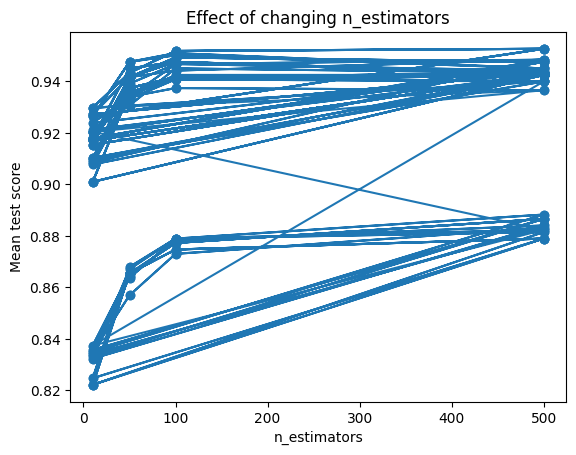

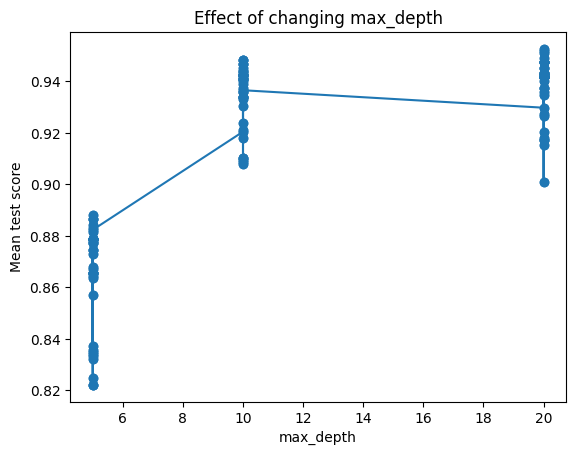

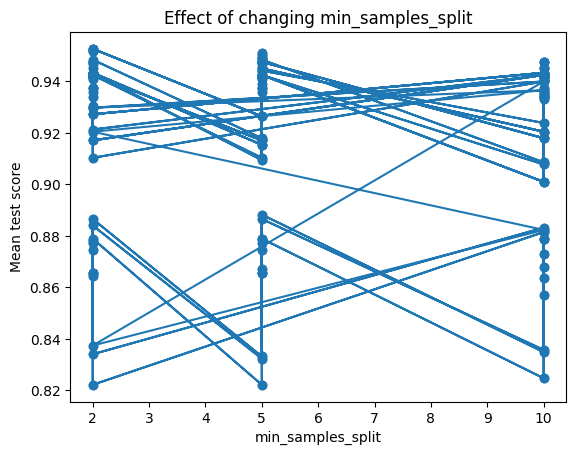

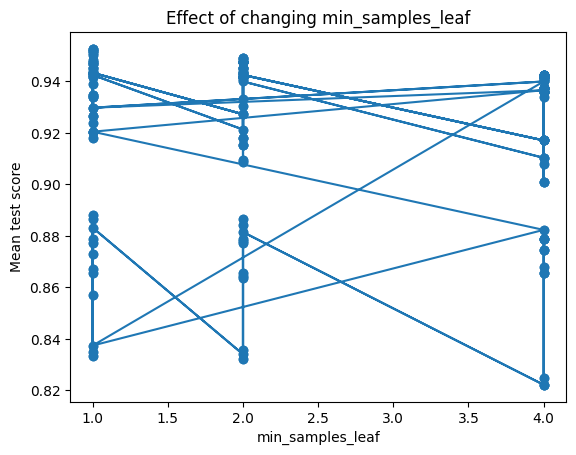

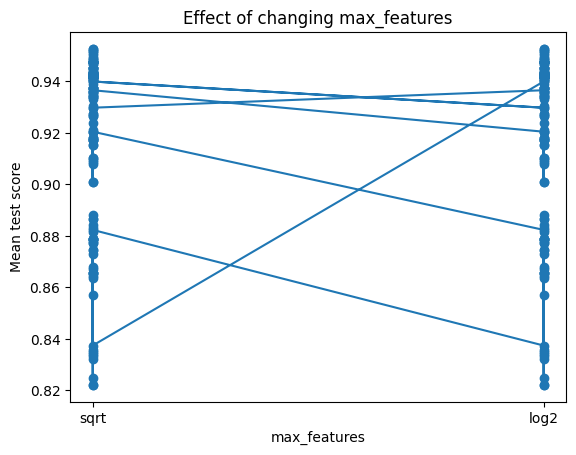

In [184]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rfc=RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_
params = results['params']
mean_test_score = results['mean_test_score']
# Plot the effect of changing n_estimators
plt.figure()
plt.plot([params[i]['n_estimators'] for i in range(len(params))], mean_test_score, 'o-')
plt.xlabel('n_estimators')
plt.ylabel('Mean test score')
plt.title('Effect of changing n_estimators')

# Plot the effect of changing max_depth
plt.figure()
plt.plot([params[i]['max_depth'] for i in range(len(params))], mean_test_score, 'o-')
plt.xlabel('max_depth')
plt.ylabel('Mean test score')
plt.title('Effect of changing max_depth')

# Plot the effect of changing min_samples_split
plt.figure()
plt.plot([params[i]['min_samples_split'] for i in range(len(params))], mean_test_score, 'o-')
plt.xlabel('min_samples_split')
plt.ylabel('Mean test score')
plt.title('Effect of changing min_samples_split')

# Plot the effect of changing min_samples_leaf
plt.figure()
plt.plot([params[i]['min_samples_leaf'] for i in range(len(params))], mean_test_score, 'o-')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean test score')
plt.title('Effect of changing min_samples_leaf')

# Plot the effect of changing max_features
plt.figure()
plt.plot([params[i]['max_features'] for i in range(len(params))], mean_test_score, 'o-')
plt.xlabel('max_features')
plt.ylabel('Mean test score')
plt.title('Effect of changing max_features')

plt.show()